In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("aerofit_treadmill.csv")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [11]:
df.isnull().sum() # checking is there any null value or not

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [10]:
df['Product'].unique() # number of uique product

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [14]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Observation:-
1. It has no null value for any feature
2. It has 3 unique product, 'KP281', 'KP481', 'KP781'
3. The age range is from 18-50 

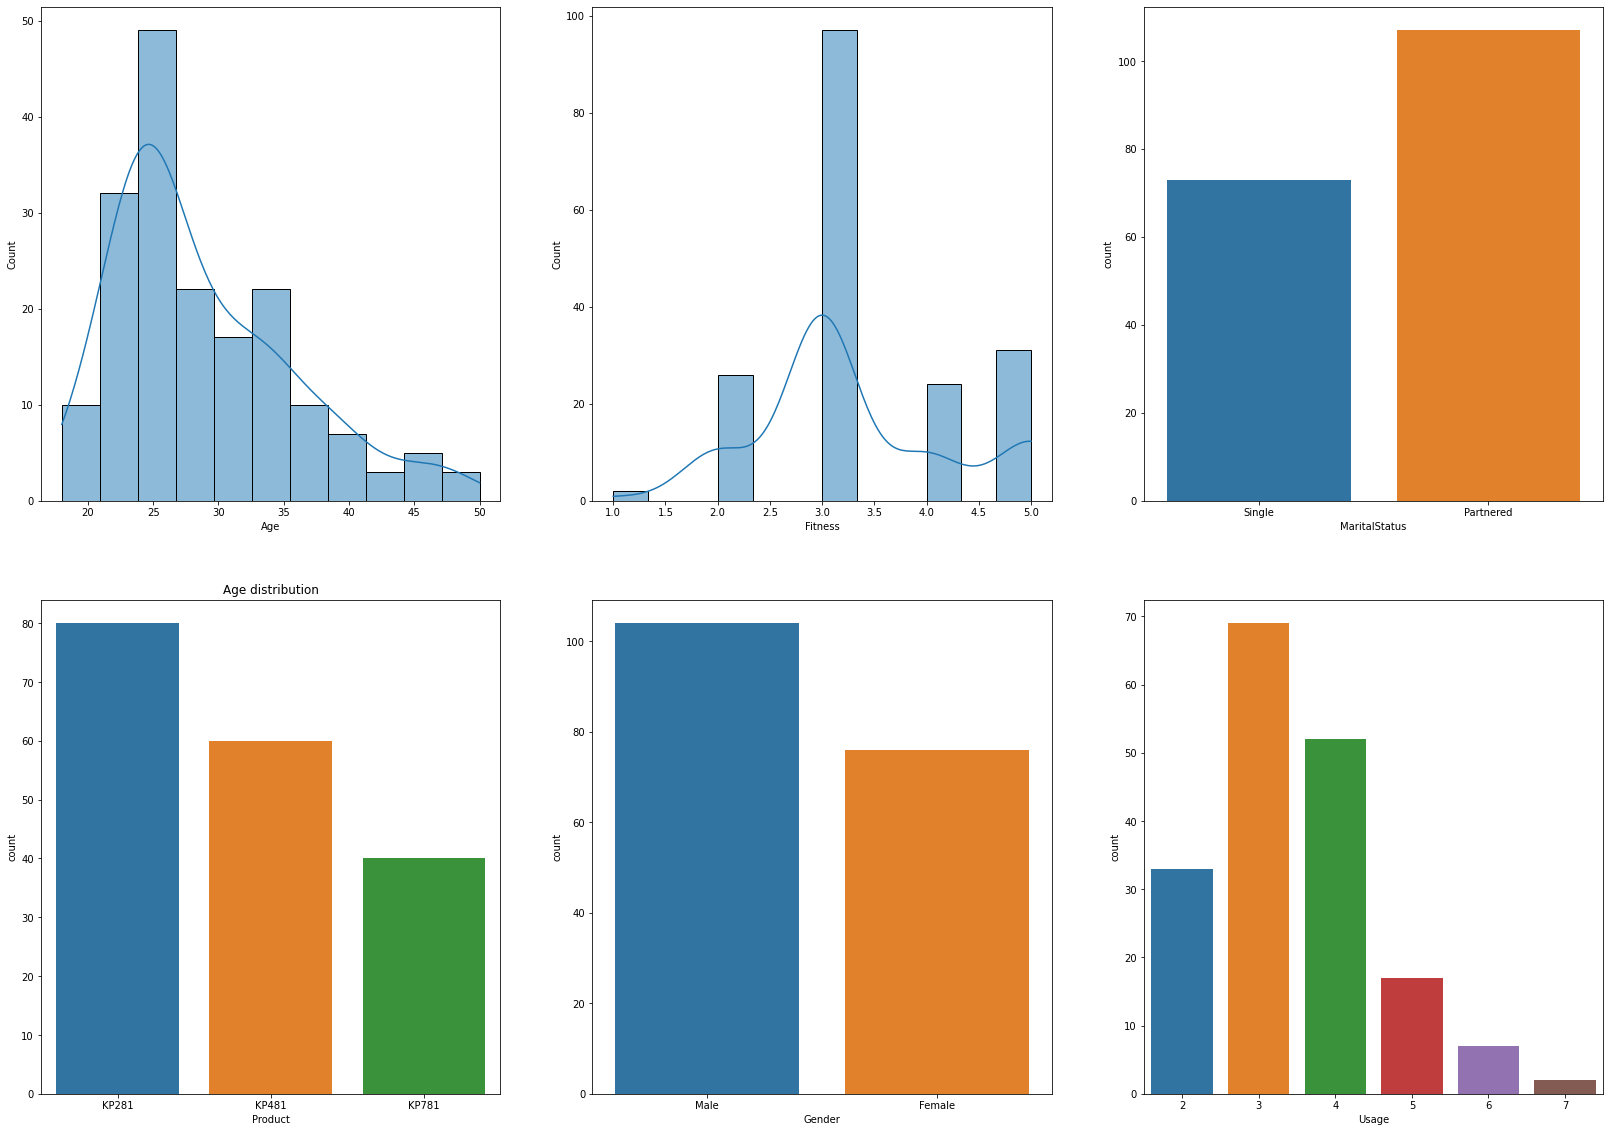

In [53]:
# Univariate Analysis

fig,ax = plt.subplots(nrows = 2,ncols=3, figsize=(28,20))
sns.histplot(data=df, x='Age', kde=True, ax = ax[0,0])
sns.histplot(data=df, x='Fitness', kde=True, ax = ax[0,1])
sns.countplot(data=df, x='MaritalStatus', ax = ax[0,2])
sns.countplot(data=df, x='Product', ax = ax[1,0])
sns.countplot(data=df, x='Gender',  ax = ax[1,1])
sns.countplot(data=df, x='Usage', ax = ax[1,2])


ax[1,0].set_title("Age distribution")
plt.show()

Observations:
1. There are more number of peoples from the age range from 20-35
2. More people from the fitness level 3-3.5
3. More partenered persons are there in data
4. KP281 is the most frequent product in data
5. More number of male in data compare to female
6. Usage with level 3 have more data

In [168]:
df.info() # can observe there is 3 objects/character type column and remaining are all integer/numeric type columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


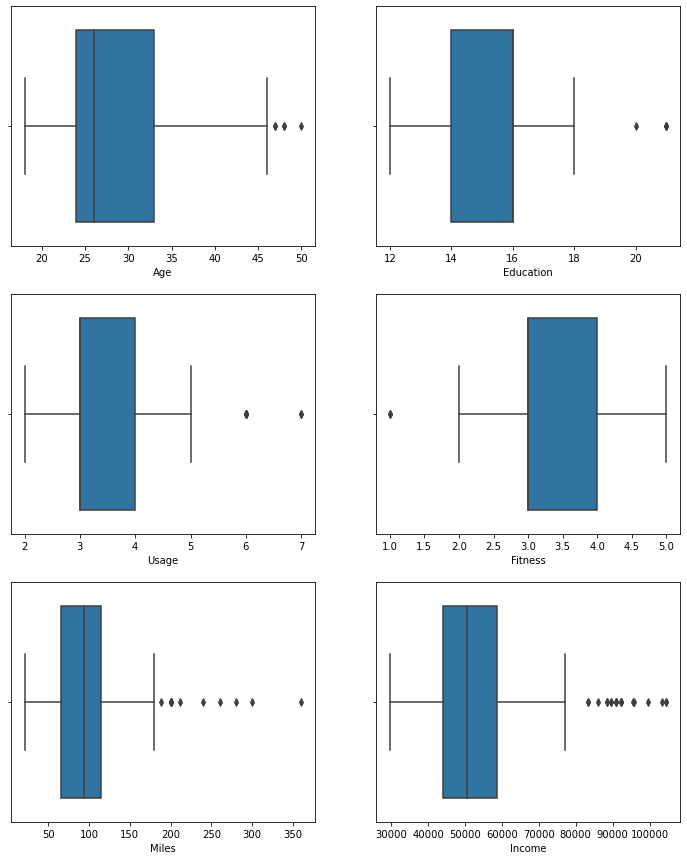

In [170]:
# Outlier identification

fig,ax = plt.subplots(nrows = 3,ncols=2, figsize=(12,15))

sns.boxplot(data=df, x='Age', ax = ax[0,0])
sns.boxplot(data=df, x='Education', ax = ax[0,1])
sns.boxplot(data=df, x='Usage', ax = ax[1,0])
sns.boxplot(data=df, x='Fitness', ax = ax[1,1])
sns.boxplot(data=df, x='Miles', ax = ax[2,0])
sns.boxplot(data=df, x='Income', ax = ax[2,1])
plt.show()
# sns.countplot(data=df, x='MaritalStatus', ax = ax[0,2])
# sns.countplot(data=df, x='Product', ax = ax[1,0])
# sns.countplot(data=df, x='Gender',  ax = ax[1,1])
# sns.countplot(data=df, x='Usage', ax = ax[1,2])


Observation:
1. Miles, Income, Age has more number of outliers
2. Education, Usage, Fitness has less number of outliers

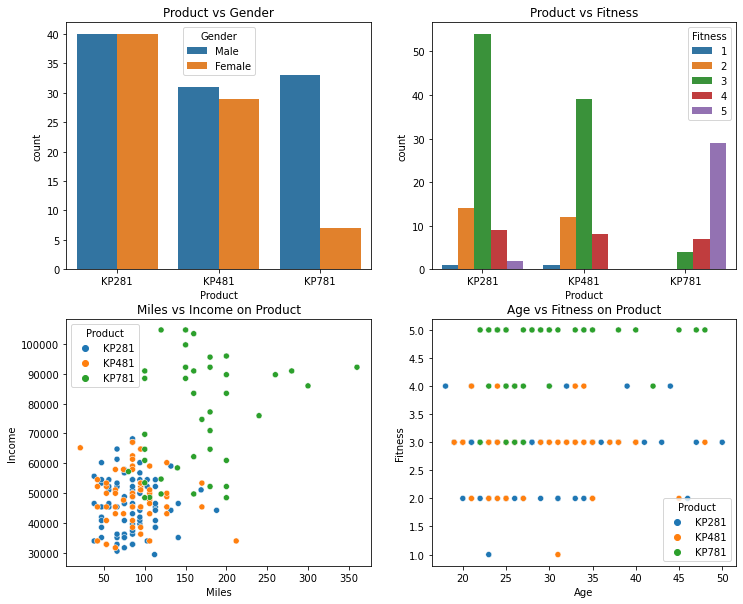

In [105]:
# Bivariate Analysis

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=((12,10)))

sns.countplot(data=df, x='Product', hue='Gender',ax=ax[0,0])
sns.countplot(data=df, x='Product', hue='Fitness',ax=ax[0,1])
sns.scatterplot(data=df, x='Miles',y="Income",hue='Product',ax=ax[1,0])
sns.scatterplot(data=df, x='Age',y="Fitness",hue='Product',ax=ax[1,1])

ax[0,0].set_title('Product vs Gender')
ax[0,1].set_title('Product vs Fitness')
ax[1,0].set_title('Miles vs Income on Product')
ax[1,1].set_title('Age vs Fitness on Product')

plt.show()

Observations:
- **`Product vs Gender`**
    - Equal number of males and females have purchased **KP281** product and Almost same for the product **KP481**
    - Most of the `Male` customers have purchased the **KP781** product.
- **`Product vs Fitness`**
    - Most of the with fitness 5 are using product **KP781**
    - Most of the with fitness 3 are using product **KP281, KP481**
- **`Miles vs Income on Product`**
    - High income people usage **KP781** and it also have high miles
    - Less income people are more focused on product **KP281, KP481**
- **`Age vs Fitness on Product`**
    - High Fitness people usage **KP781** and it also have high miles
    - Less Fitness eople are more focused on product **KP281, KP481**

In [110]:
df[['Age','Miles']].groupby(df['Product']).describe().T

Product           KP281       KP481       KP781
Age   count   80.000000   60.000000   40.000000
      mean    28.550000   28.900000   29.100000
      std      7.221452    6.645248    6.971738
      min     18.000000   19.000000   22.000000
      25%     23.000000   24.000000   24.750000
      50%     26.000000   26.000000   27.000000
      75%     33.000000   33.250000   30.250000
      max     50.000000   48.000000   48.000000
Miles count   80.000000   60.000000   40.000000
      mean    82.787500   87.933333  166.900000
      std     28.874102   33.263135   60.066544
      min     38.000000   21.000000   80.000000
      25%     66.000000   64.000000  120.000000
      50%     85.000000   85.000000  160.000000
      75%     94.000000  106.000000  200.000000
      max    188.000000  212.000000  360.000000

In [171]:
# statistical analysis

df['Gender'].value_counts()

# there is less number of females in data

Male      104
Female     76
Name: Gender, dtype: int64

In [172]:
# computing marginal probability

df['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

Observation:
1. the prob(**KP281**) = 0.44
2. the prob(**KP481**) = 0.33
3. the prob(**KP781**) = 0.22

In [173]:
# computing conditional probability

df1 = pd.crosstab(index=df['Gender'], columns=df['Product'])
df1

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [174]:
pd.crosstab(index=df['Gender'], columns=df['Product'],margins=True, normalize='index' )

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222


In [175]:
# probability of product given its gender

def p_prob_given_gender(gender):
    if gender not in df['Gender'].unique():
        print('Gender not found')
        
    else:
        p_KP281 = df1['KP281'][gender] / df1.loc[gender].sum()
        p_KP481 = df1['KP481'][gender] / df1.loc[gender].sum()
        p_KP781 = df1['KP781'][gender] / df1.loc[gender].sum()
        
        print(f'p_KP281 : {gender} - {p_KP281:.2f}')
        print(f'p_KP481 : {gender} - {p_KP481:.2f}')
        print(f'p_KP781 : {gender} - {p_KP781:.2f}')
        
p_prob_given_gender('Male')
print()
p_prob_given_gender('Female')

p_KP281 : Male - 0.38
p_KP481 : Male - 0.30
p_KP781 : Male - 0.32

p_KP281 : Female - 0.53
p_KP481 : Female - 0.38
p_KP781 : Female - 0.09


Observation:
 1. Prob of buying the product KP281 is more for female
 2. The prob of buying product KP781 is more for male, it may because of less number of female data in the given data

In [176]:
# probability of product given its marital status

df1 = pd.crosstab(index=df['MaritalStatus'], columns = df['Product'],normalize='index', margins=True)
df1

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877
All,0.444444,0.333333,0.222222


In [177]:
def p_prod_given_ms(marital_status):
    p_KP281 = df1['KP281'][marital_status] / df1.loc[marital_status].sum()
    p_KP481 = df1['KP481'][marital_status] / df1.loc[marital_status].sum()
    p_KP781 = df1['KP781'][marital_status] / df1.loc[marital_status].sum()
    
    print(f'p_KP281 : {marital_status} - {p_KP281:.2f}')
    print(f'p_KP481 : {marital_status} - {p_KP481:.2f}')
    print(f'p_KP781 : {marital_status} - {p_KP781:.2f}')   
    
p_prod_given_ms('Partnered')
print()
p_prod_given_ms('Single')


p_KP281 : Partnered - 0.45
p_KP481 : Partnered - 0.34
p_KP781 : Partnered - 0.21

p_KP281 : Single - 0.44
p_KP481 : Single - 0.33
p_KP781 : Single - 0.23


Observation:
- The marital Status is not affects more on any product

Recommandation:

- As there is KP781 product is more suitable only for the people who has high income, so have to make this product more on - lower or median income persons also to improve sale in market
- KP781 product is more comfortable for male, but it is not suitable for female. so have to focus on to make update/changes in the product for female frindly.